<a name = "inicio"></a>
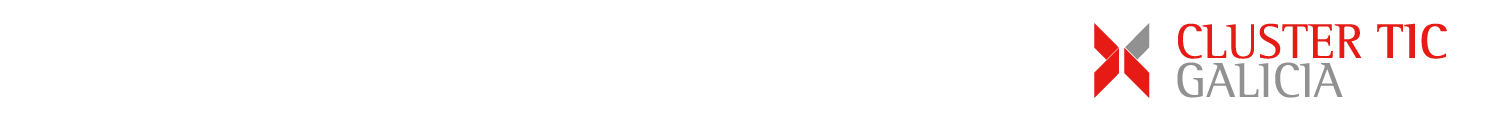

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Distribuciones</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Una de las primeras cosas que normalmente queremos hacer ante un conjunto de datos es analizar la distribución de sus características, tanto consideradas independientemente como por parejas. Estas visualizaciones nos van a dar una primera visión general del perfil de nuestros datos: si son simétricos, si están muy repartidos, si tienen outliers...

En este primer bloque de funciones vamos a revisar las herramientas que ofrece Seaborn con este objetivo.

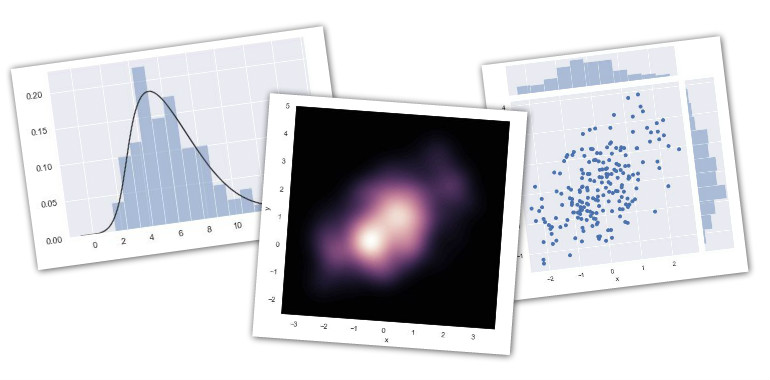

# Distribuciones univariadas

En este tipo de gráficas estamos analizando la distribución de una variable, es decir, como se reparten los valores a lo largo del dominio de ésta. La función a nivel de figura que nos permite crear este tipo de gráficas es [sns.displot](https://seaborn.pydata.org/generated/seaborn.displot.html), dando al parámetro **kind** el valor que corresponda.

### Rug plot

La primera opción que tenemos es la llamada en inglés "rug plot" (*gráfica de alfombrilla*). Este tipo de gráficas muestra la distribución de una variable con marcas representando los valores en un único eje.

En Seaborn disponemos de la función [seaborn.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html) con este fin:

In [4]:
y = np.random.normal(size = 100)

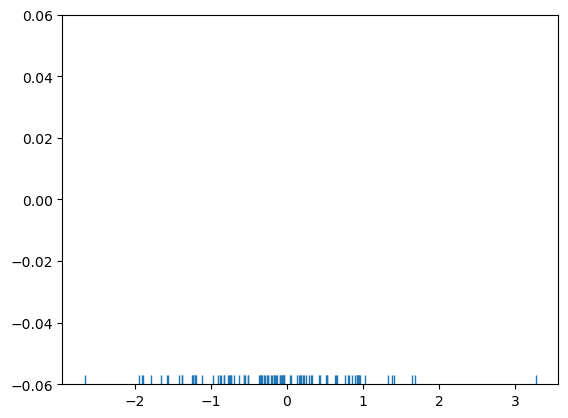

In [5]:
sns.rugplot(y)
plt.show()

El único argumento obligatorio es la estructura conteniendo los valores. Es posible controlar la altura de las marcas y el eje en el que se va a mostrar con los parámetros **height** y **x** o **y**, respectivamente. En los siguientes ejemplos se personalizan ambos:

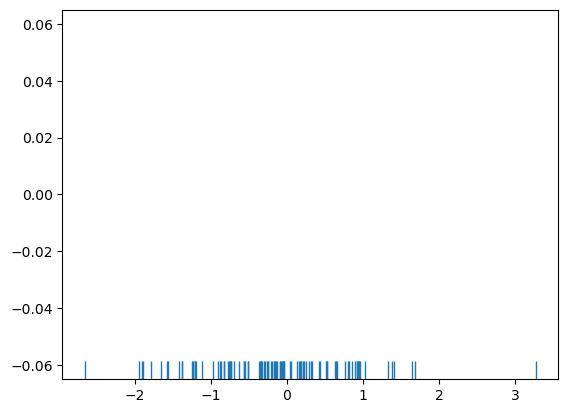

In [6]:
sns.rugplot(x = y, height = 0.05)
plt.show()

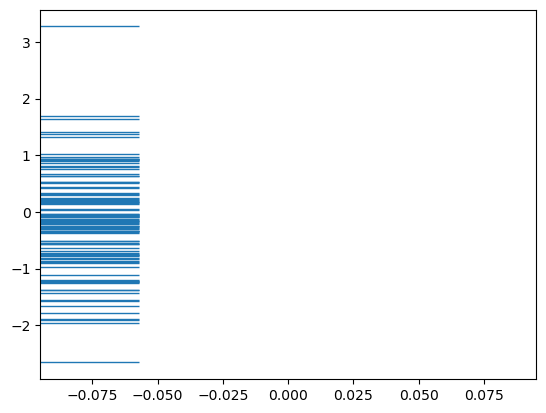

In [7]:
sns.rugplot(y = y, height = 0.2)
plt.show()

Ésta es una función a nivel de ejes, lo que implica que puede ser mostrada en un conjunto de ejes cualquiera. Esta funcionalidad no está disponible directamente con una función a nivel de figura (puede mostrarse, pero junto a un histograma, como veremos a continuación).

### Histogramas

Una segunda forma de mostrar la distribución de una variable es mostrar un histograma, lo que podemos conseguir con la función [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) -función a nivel de eje-:

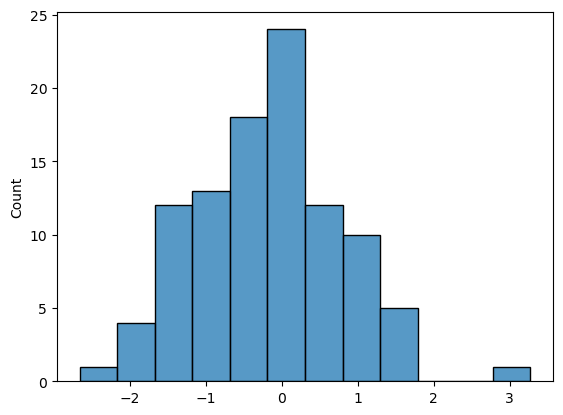

In [8]:
sns.histplot(y)
plt.show()

Si usamos la función a nivel de figura [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html), podemos incluir el "*rug plot*" también en el histograma, utilizando el parámetro homónimo:

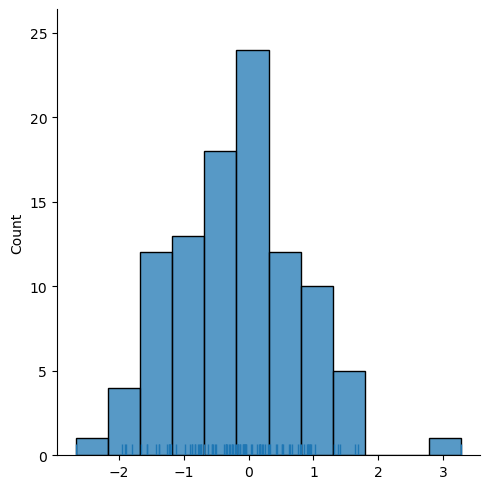

In [9]:
sns.displot(y, rug = True)
plt.show()

También podemos mostrar el *kde* (*Estimación de Densidad Kernel*):

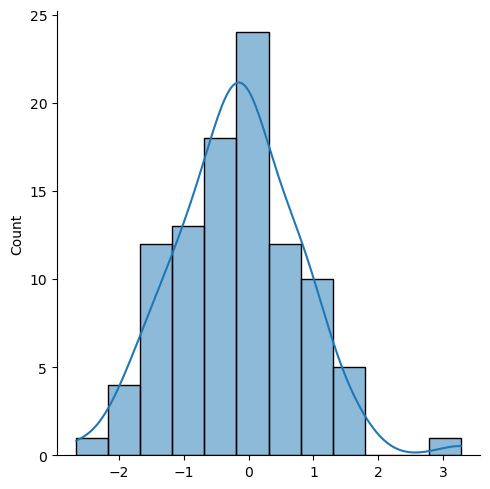

In [10]:
sns.displot(y, kde = True)
plt.show()

Por último, el número de bins se controla con el parámetro del mismo nombre:

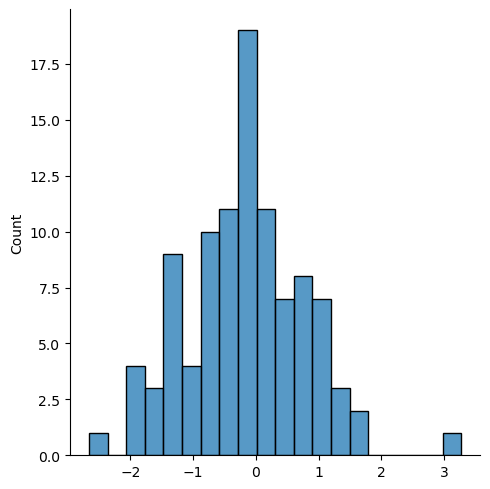

In [11]:
sns.displot(y, bins = 20)
plt.show()

### Estimación de densidad kernel

La **estimación de densidad kernel** (**KDE** o **Kernel Density Estimation**) es menos usada que el histograma, pero puede ser una útil herramienta para mostrar la distribución de una variable. Un KDE es un método para estimar la función de densidad de probabilidad de una variable aleatoria continua.
Para construir el KDE se considera una función de distribución -el kernel- y un parámetro de suavizado denominado genéricamente **bandwidth**. Cada observación se sustituye por el kernel. A continuación, se suman las curvas para obtener el valor de la densidad en cada punto. Por último, la curva resultante se normaliza para que el área bajo ella sea igual a 1.

La función a nivel de ejes para crear esta gráfica es [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html):

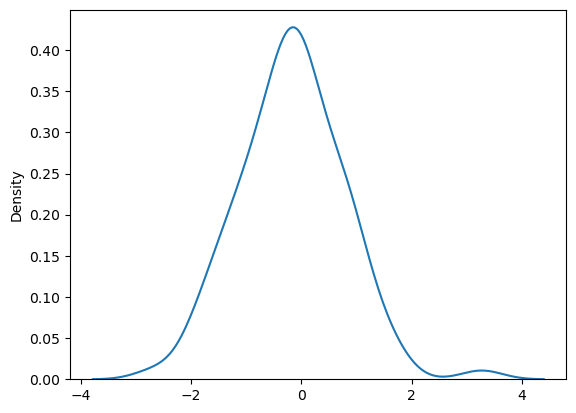

In [12]:
sns.kdeplot(y)
plt.show()

Es posible controlar el suavizado mediante el parámetro **bw_method**:

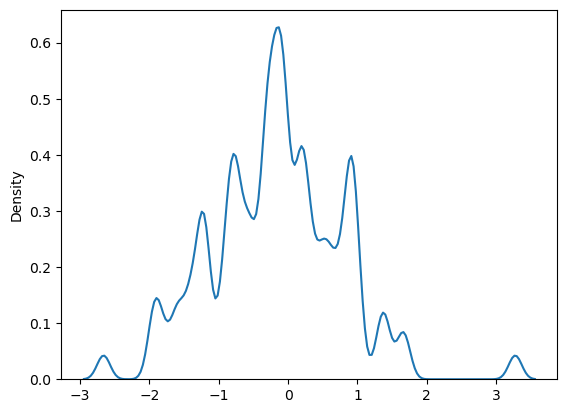

In [13]:
sns.kdeplot(y, bw_method = 0.1)
plt.show()

También podemos usar la función *sns.displot()* mostrando, junto al histograma, el kde:

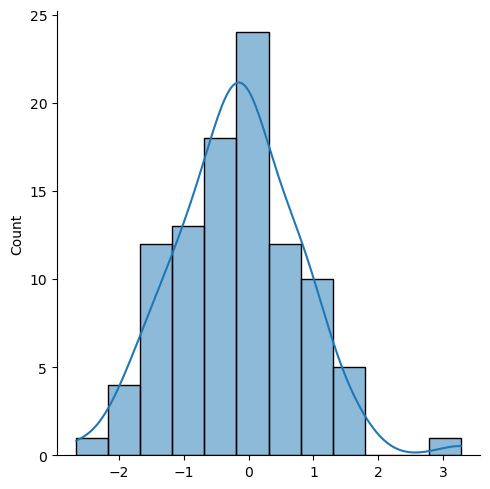

In [14]:
sns.displot(y, kde = True)
plt.show()

# Distribuciones bivariadas

Otro de los escenarios en los que podemos encontrarnos es aquel en el que deseamos evaluar la distribución conjunta de dos variables. Podemos utilizar la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) con este fin. Esta función nos muestra una figura multipanel en la que se incluye una gráfica principal mostrando la distribución conjunta de las dos variables en análisis y la distribución marginal de cada una de las variables por separado.

### Gráfico de dispersión

El comportamiento por defecto de la función *seaborn.jointplot()* es mostrar un gráfico de dispersión de las dos variables siendo analizadas y un histograma adicional para cada una de ellas:

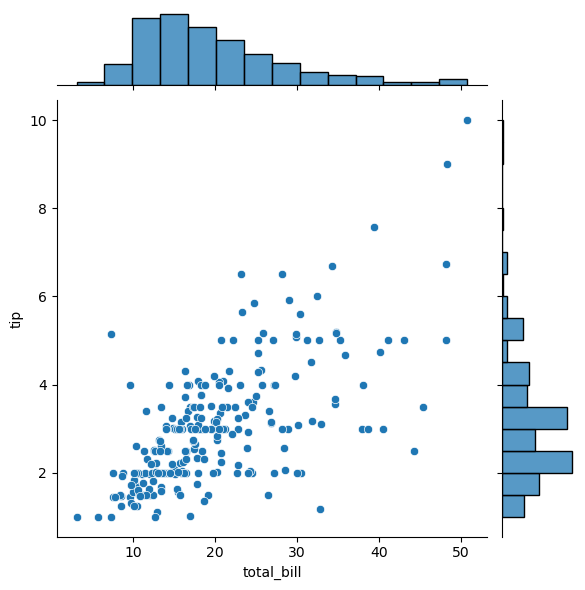

In [15]:
sns.jointplot(data = tips, x = "total_bill", y = "tip")
plt.show()

En el gráfico anterior estamos cruzando las variables *total_bill* y *tip* del dataset *tips*, y vemos en el centro el gráfico de dispersión de ambas variables, así como los histogramas de cada variable en la parte superior y lateral derecho.

El parámetro **kind** de la función *sns.jointplot()* toma por defecto el valor "*scatter*", por lo que las dos funciones siguientes son equivalentes:

sns.jointplot(data = tips, x = "total_bill", y = "tip")

sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "scatter")

### Gráfico de dispersión hexagonal

Una alternativa al gráfico de dispersión es el gráfico de dispersión hexagonal, en el que el plano se divide en hexágonos y se muestra con distintos colores el número de valores o puntos en cada hexágono:

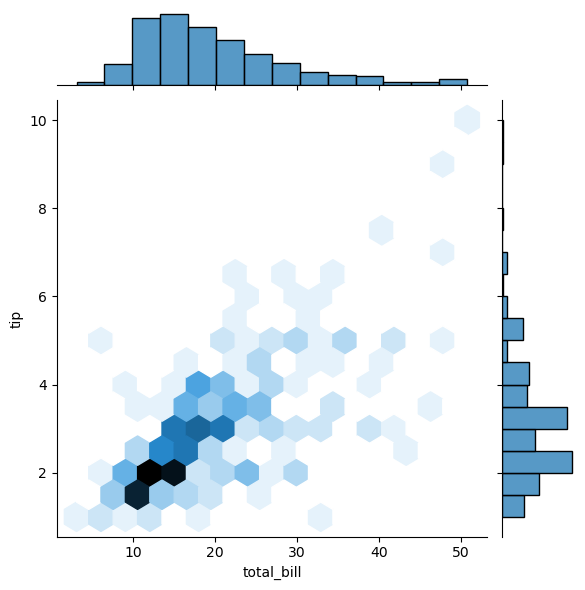

In [16]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "hex")
plt.show()

Vemos que el único cambio con repecto a la función equivalente que genera el gráfico de dispersión es la inclusión del argumento *kind = "hex"*.

Para controlar el número de hexágonos a mostrar tenemos que hacer uso del parámetro **joint_kws**. Este parámetro es un diccionario que nos permite pasar a la función parámetros adicionales, como **gridsize**, parámetro que controla exactamente el número de hexágonos:

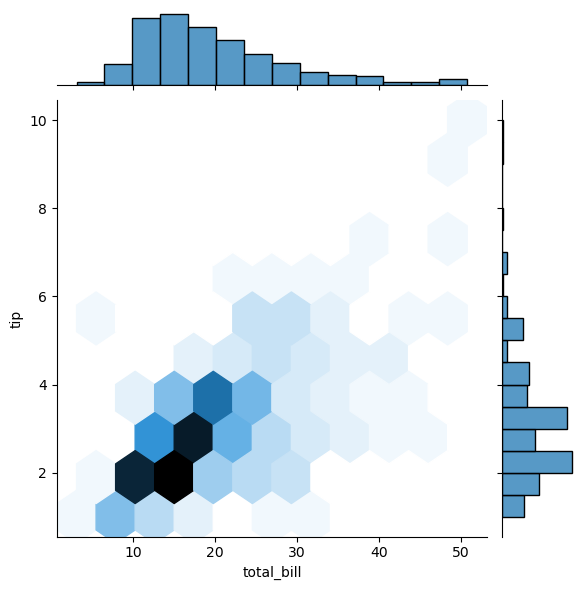

In [17]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "hex", joint_kws = {"gridsize": 10})
plt.show()

A la clave *gridsize* podemos asignarle un único valor (que definirá el número de hexágonos en las dos dimensiones) o una tupla de dos valores (que definirán el número de hexágonos en el eje $x$ y en el eje $y$):

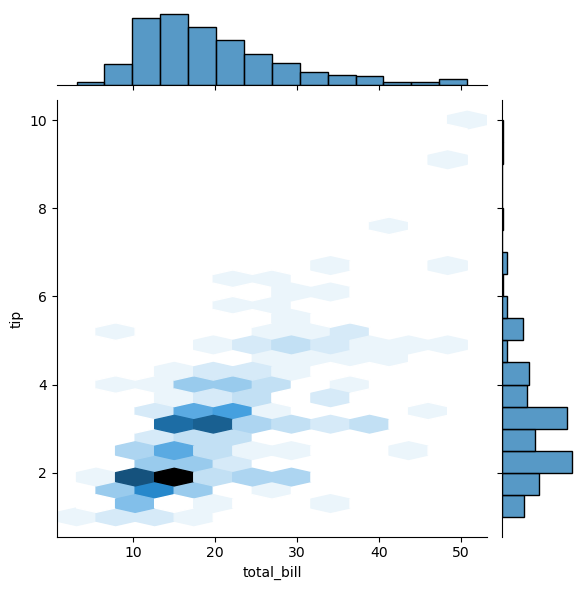

In [18]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "hex", joint_kws = {"gridsize": (10, 15)})
plt.show()

### Estimación de densidad kernel

También podemos mostrar en la gráfica central la estimación de densidad kernel para visualizar la distribución bivariada. Para ello no tenemos más que pasar a la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) el argumento *kind = "kde"*:

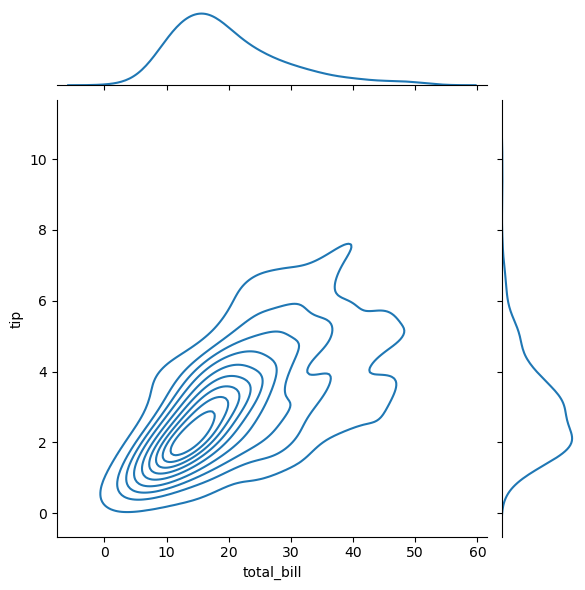

In [19]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "kde")
plt.show()

### La función kdeplot para distribuciones bivariadas

También es posible utilizar la función [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) ya vista para mostrar la distribución de dos variables. Para esto basta con pasar como primeros argumentos las referencias a las característica en cuestión.

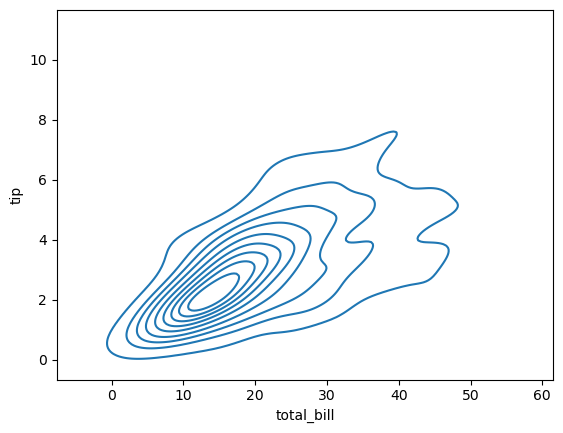

In [20]:
sns.kdeplot(data = tips, x = "total_bill", y = "tip")
plt.show()

El parámetro **fill**, cuando toma el valor *True*, rellena los contornos:

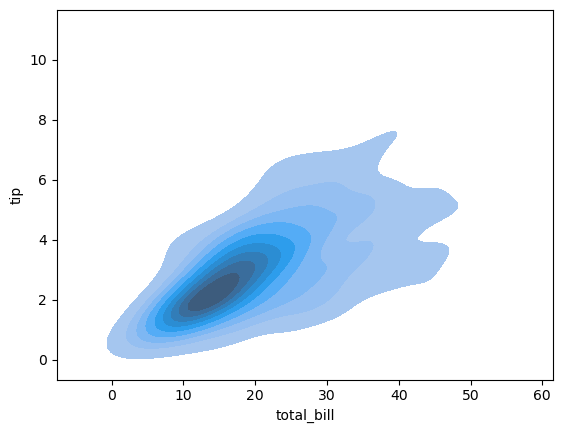

In [21]:
sns.kdeplot(data = tips, x = "total_bill", y = "tip", fill = True)
plt.show()

El parámetro **n_levels** controla el número de niveles distintos a mostrar:

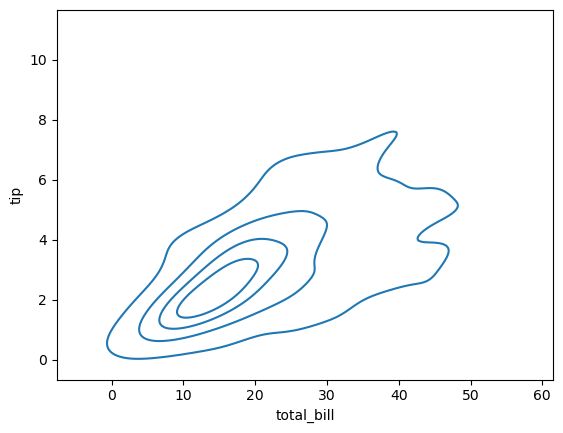

In [22]:
sns.kdeplot(data = tips, x = "total_bill", y = "tip", n_levels = 5)
plt.show()

### Distribuciones de varias variables

Con el fin de de visualizar múltiples distribuciones bivariadas de conjuntos de datos podemos recurrir a la función [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Esta función a nivel de figura crea una matriz de ejes y muestra la distribución de cada par de características:

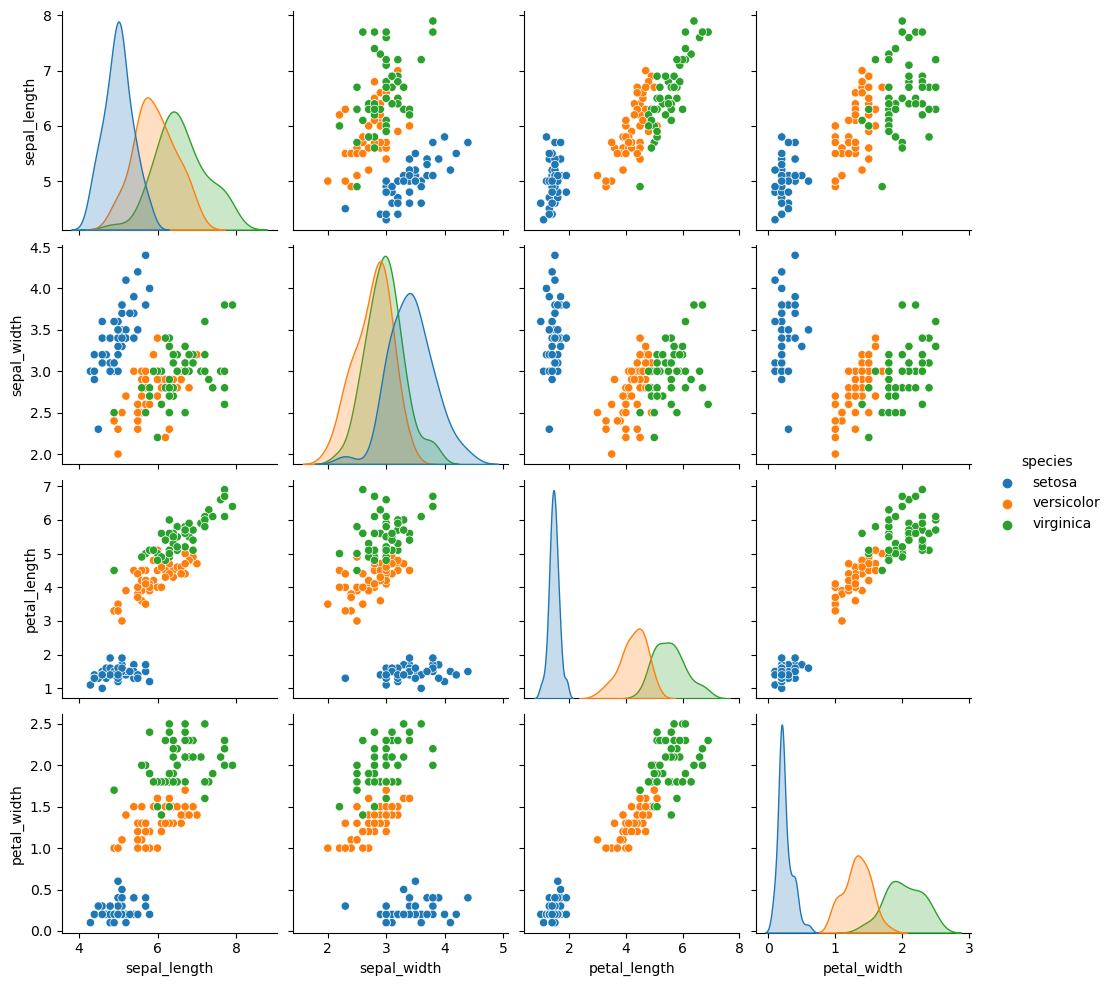

In [23]:
sns.pairplot(iris, hue = "species")
plt.show()

Vemos que en la diagonal principal se muestran las distribuciones univariadas de cada característica. También vemos que podemos hacer depender el color de cada punto y de cada histograma de un campo.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>